## Tutoriais baseados no livro "Mãos à obra - Aprendizado de máquina" 

## Author: Aurélien Géron

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [109]:
housing = pd.read_csv("housing.csv")

In [110]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [111]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Verificando ocean_proximity

In [112]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Resumo dos atributos numéricos com describe()

In [113]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Criação de histogramas

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

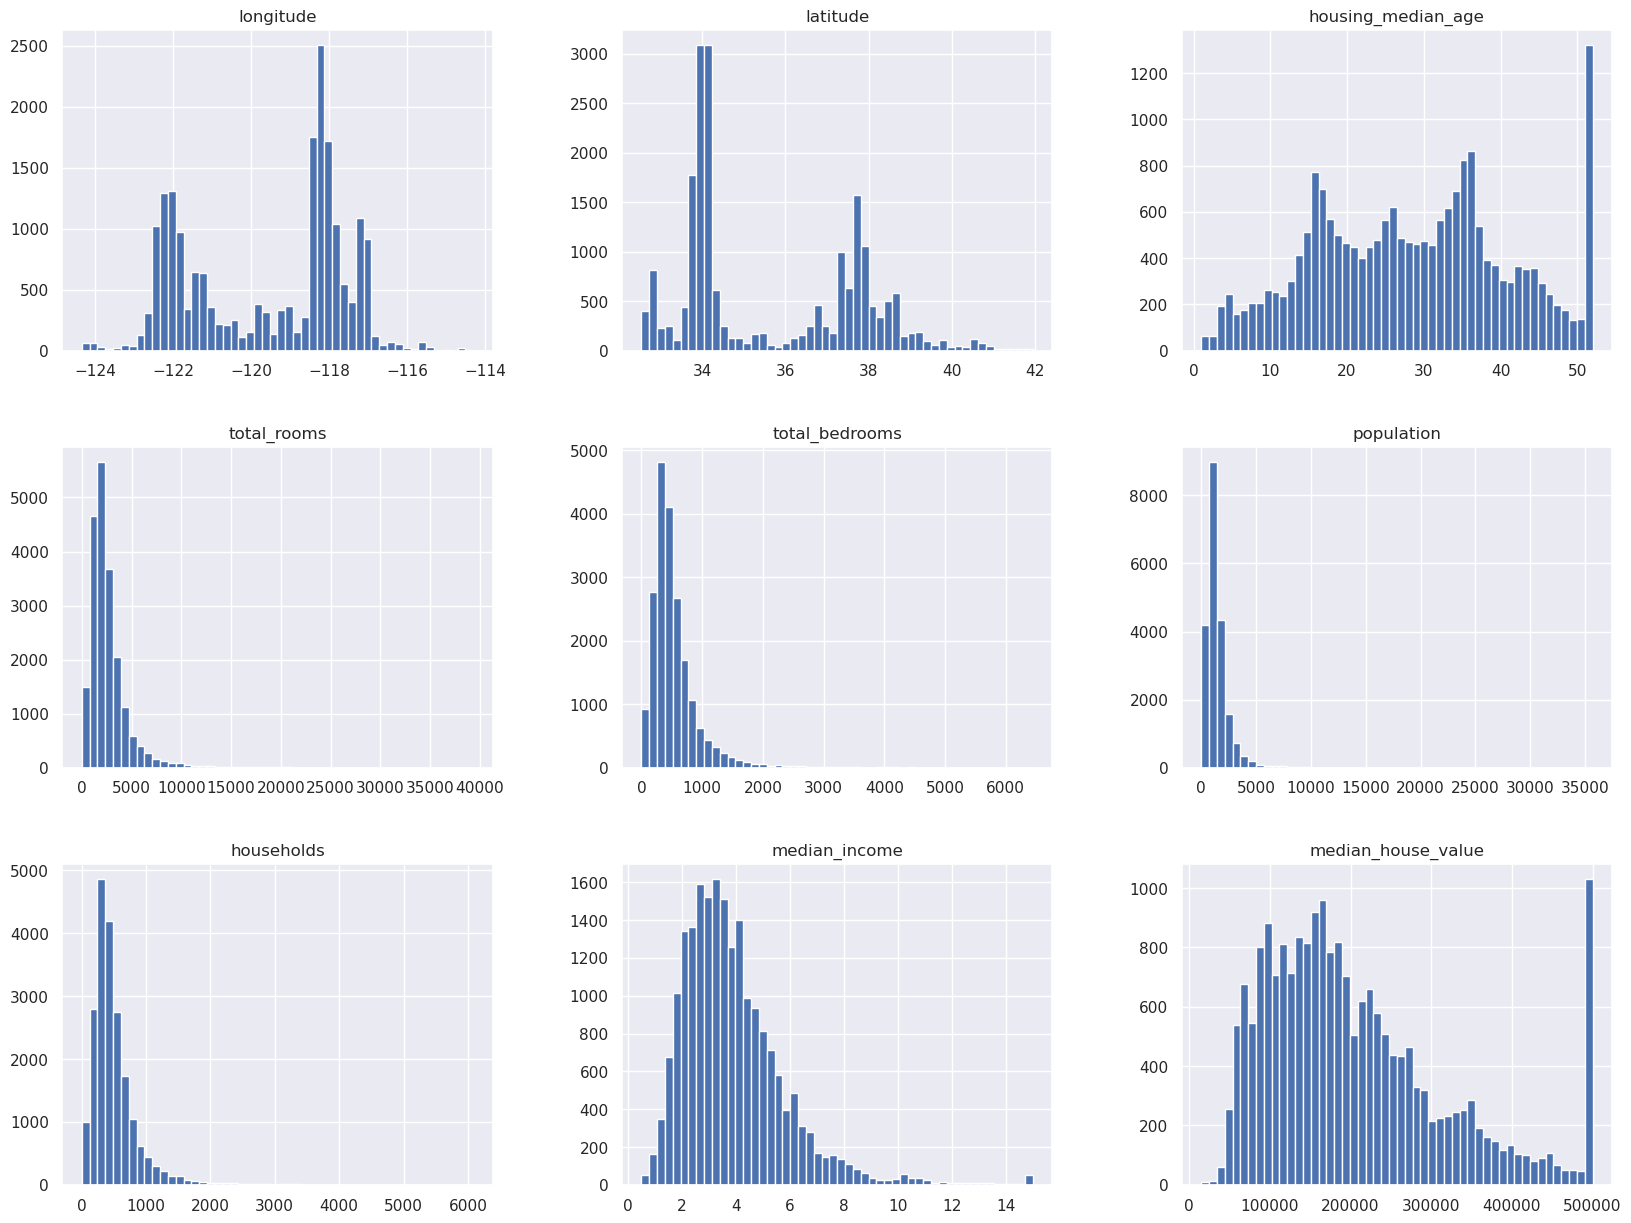

In [114]:
housing.hist(bins=50, figsize=(20,15))

#### Dividindo os dados em teste e treino

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### A amostragem puramente aleatória pode enviesar os dados e mascarar a representatividade da população

#### Criando um atributo da categoria da renda dividindo a renda média por 1,5 e arredondando para obter categorias discretas

Dividiu-se por 1,5 para   limitar o número de categorias da renda

#### Isso será necessário para a amostragem estratificada com base na renda média, que é um atributo muito significativo para estimar os preços médios

In [117]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

<AxesSubplot:>

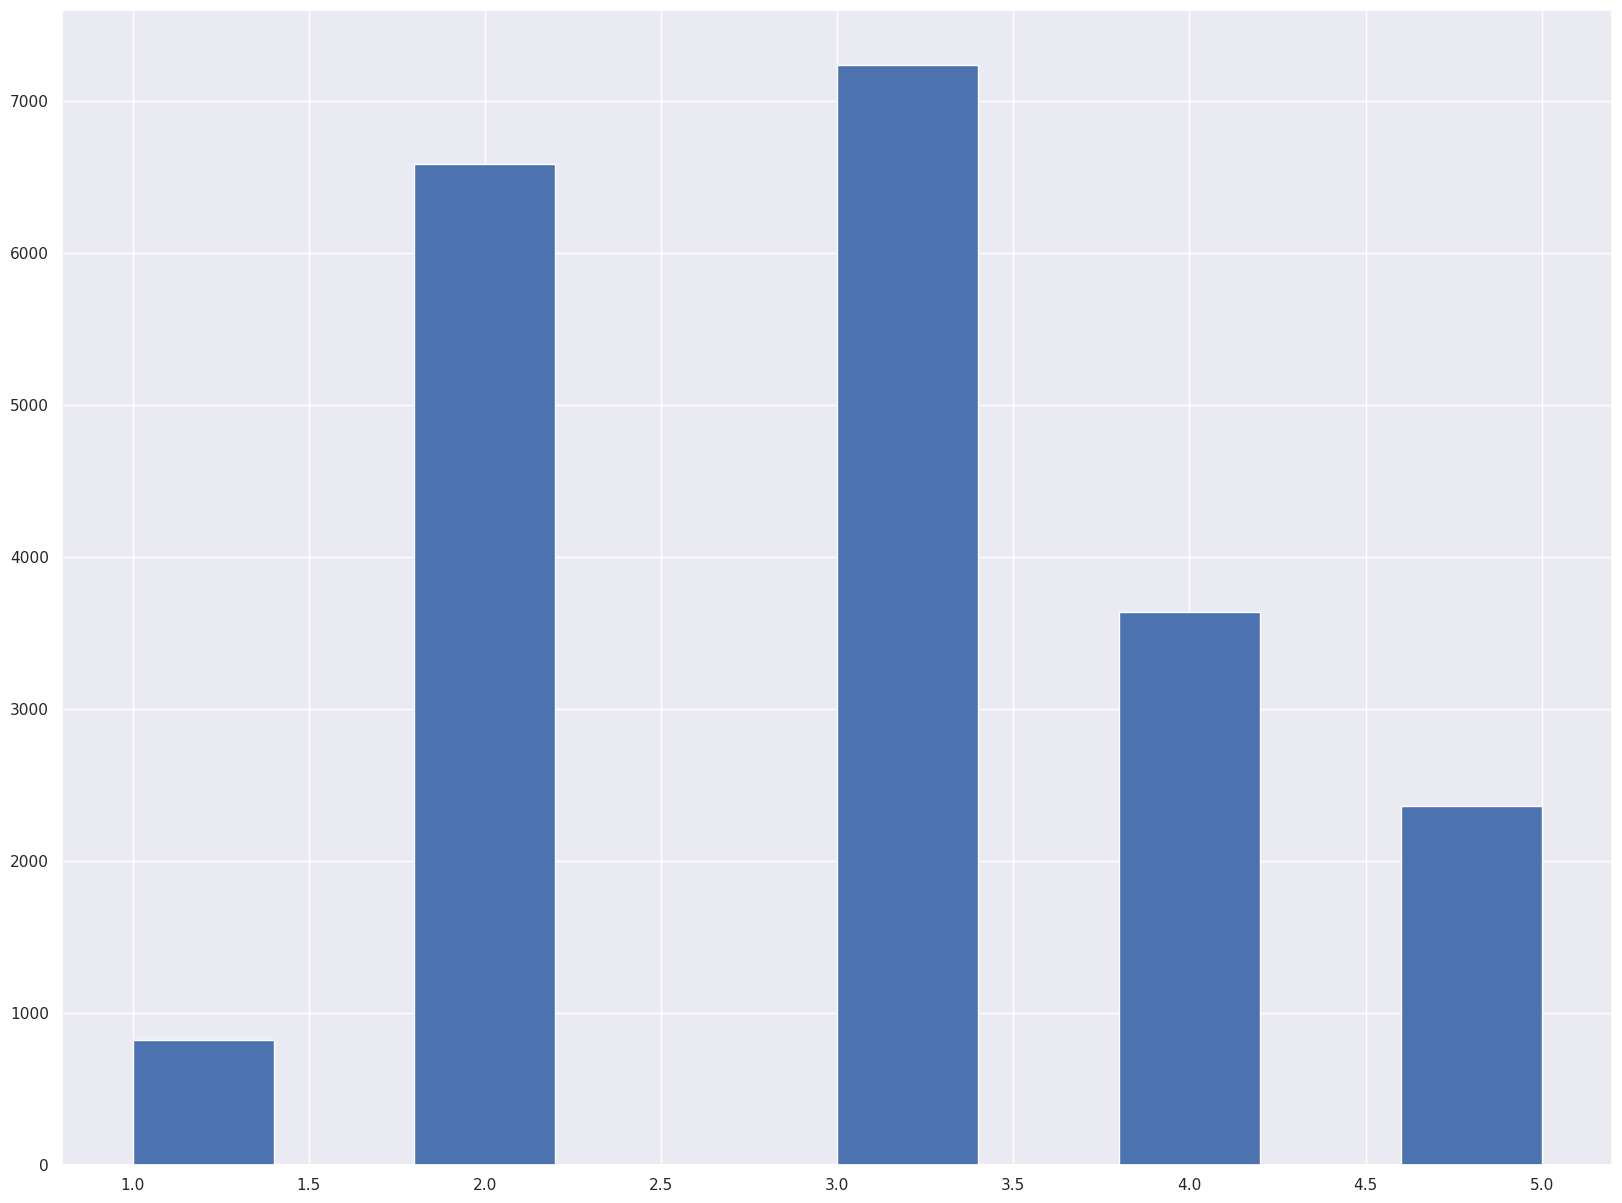

In [118]:
housing["income_cat"].hist(figsize=(20,15))

#### Realizando a amostragem estratificada com base na categoria da renda

In [119]:
from sklearn.model_selection import StratifiedShuffleSplit

In [120]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [121]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Analisando as proporções da categoria de renda no conjunto de testes

In [122]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

#### Removendo o atributo "income_cat" para que os dados retornem ao estado original

In [123]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### Criando uma cópia do conjunto treino

In [124]:
housing = strat_train_set.copy()

#### Visualizando os dados

In [125]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

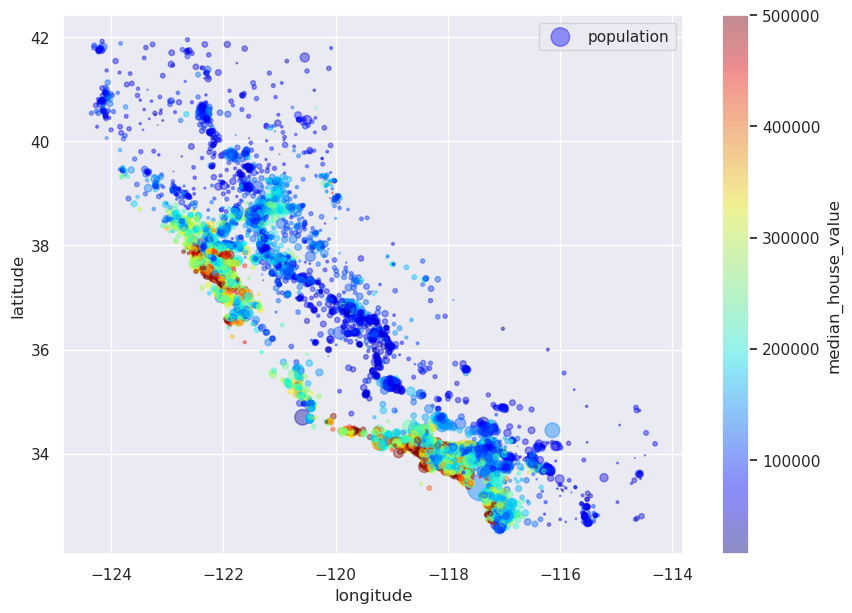

In [126]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)

#### Obtendo correlações

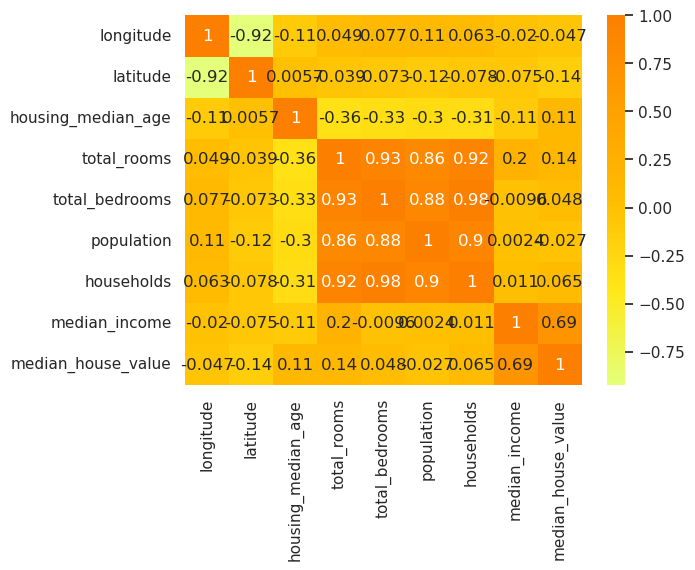

In [127]:
sns.heatmap(housing.corr(), cmap="Wistia", annot=True)
corr_matrix = housing.corr()

#### Correlação de cada atributo com o valor médio da habitação

In [128]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

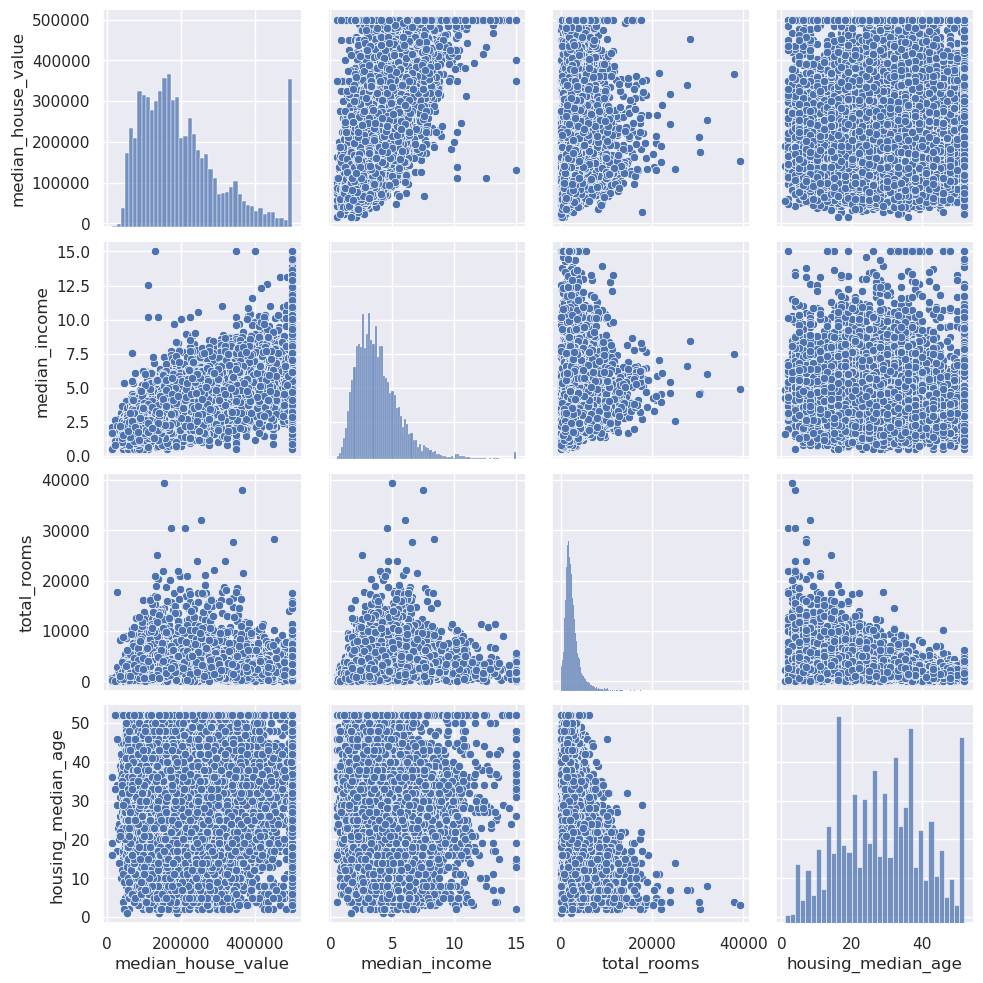

In [129]:
features = ["median_house_value", "median_income", "total_rooms",
            "housing_median_age"]

sns.pairplot(
    data=housing[features]
)

#### Observa-se que a feature mais promissora para prever o valor médio da habitação é a renda média

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

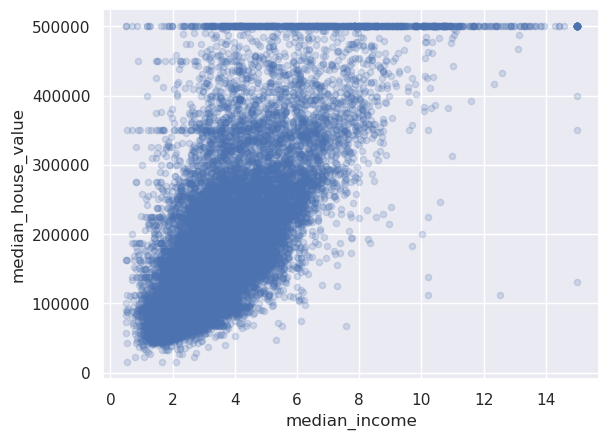

In [130]:
housing.plot(
    x="median_income", y="median_house_value", kind="scatter",
    alpha=0.2
)

#### Plotando um modelo linear entre  e o valor médio da habitação

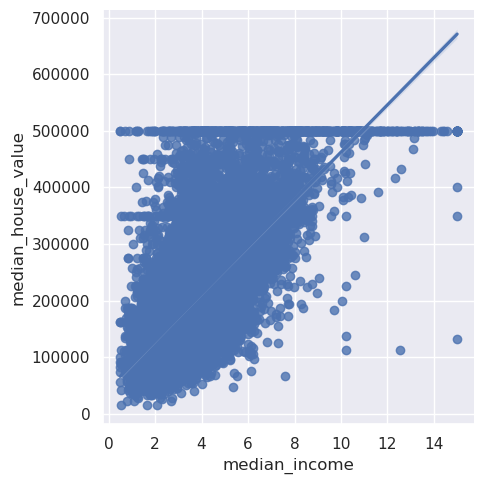

In [131]:
sns.lmplot(
    data=housing, x="median_income", y="median_house_value",
)

#### Combinação/Criação de atributos

In [132]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

#### Verificando novamente a matriz de correlação

In [133]:
corr_matrix = housing.corr()

In [134]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

#### Obtendoum conjunto de treinamento limpo com previsores e rótulos separados

In [135]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Limpando os dados

#### Métodos do pandas:

1) dropna()

    - Retira os dados corespondentes aos NaN'a

2) drop()

    - Retira todo o dado 

3) fillna()

    - Subsituti os NaN's por outros valores como zero, média, mediana, etc

#### Utilizando a calsse Imputer do Scikit-Learn

In [138]:
from sklearn.impute import SimpleImputer

In [139]:
imputer = SimpleImputer(strategy="median")

#### Criando uma cópia dos dados sem os atributos categóricos (ocean_proximity)

In [140]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [142]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [144]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [145]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [146]:
X = imputer.transform(housing_num)

#### Manipulando texto e atributos categóricos

In [148]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

#### A maioria dos algoritmos de Machine Learning preferem trabalhar com números

#### Utilizando o método factorize() do Pandas para converter cada categorias de texto em um número inteiro diferente

In [150]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [151]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

#### Outro método: One-hot encoding

Criação de um atributo binário por categoria
Apenas um atributo será igual a 1 (hot), enquanto os outros serão 0 (cold)

In [152]:
from sklearn.preprocessing import OneHotEncoder

In [153]:
encoder = OneHotEncoder()

In [155]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

# Utilização de matriz esparsa para armazenar apenas a localização dos elementos diferentes de zero

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Customizando transformadores

Normalmente é necessário desenvolver transformadores próprios para operações como limpeza personalizadas ou combinações de features específicos

In [162]:
from sklearn.base import BaseEstimator, TransformerMixin

In [163]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [164]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [165]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Escalonamento de features

Pode ser de dois tipos: escala min-max (normalização) ou padronização

#### Pipelines de Transformação

Facilitam a execução das etapas de transformação de dados na ordem correta

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### Criando o pipeline

In [168]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

#### Aplicando pipeline aos dados

In [169]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

#### Foi necessário fornecer um dataframe já com os dados numéricos. Contudo, é possível fornecer um dataframe que possua dados categóricos bastando criar uma outra classe que extraia os dados numéricos automaticamente

In [170]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [173]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [174]:
num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

In [175]:
from sklearn.pipeline import FeatureUnion

In [177]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline)
])

In [178]:
housing_prepared = full_pipeline.fit_transform(housing)

#### Selecionando e treinando um modelo

#### Modelo de Regressão Linear

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [185]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [187]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 91170.11109651 294857.43678558 173242.67670277 180281.02934248
 240711.25102797]


In [189]:
print("Labels", list(some_labels))

Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


#### Medindo o RMSE

In [190]:
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
housing_predictions = lin_reg.predict(housing_prepared)

In [192]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69422.37851647807

In [194]:
r2_score(housing_labels, housing_predictions)

0.6399615989772641

#### Testando o modelo DecisionTreeRegressor (Árvores de Decisão)

Esse modelo é capaz de encontrar relações não lineares complexas nos dados

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [198]:
housing_predictions = tree_reg.predict(housing_prepared)

In [199]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [200]:
r2_score(housing_labels, housing_predictions)

1.0

#### O modelo pode ter se sobreajustado mal aos dados

#### Pode-se utilizar a validação cruzada do Scikit-Learn para avaliar o modelo

#### Validação cruzada K-fold:

Divide-se aleatoriamente o conjunto de treinamento em X subconjuntos distintos chamados de partes (folds), então treina-se e avalia-se o modelo X vezes escolhendo uma parte (fold) diferente a cada uma das vezes para avaliação e treinamento nas outras X-1 partes. O resultado é um array contendo as X pontuações de avaliação.

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)

In [203]:
tree_rmse_scores = np.sqrt(-scores)

In [205]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard deviation:", scores.std())

In [206]:
display_scores(tree_rmse_scores)

Scores [79380.49519087 74717.53173674 72405.23207881 74873.78645784
 71550.52281427 77106.31069381 70758.12901519 71665.73948652
 70018.09805963 74286.47534336]
Mean 73676.23208770568
Standard deviation: 2815.463134194242


#### Calculando as mesmas pontuações para o modelo de Regressão Linear

In [207]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)

In [208]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [209]:
display_scores(lin_rmse_scores)

Scores [72424.49178579 64883.45415296 68552.37801022 69159.90629592
 67760.01538998 73114.57555109 76196.44163366 69518.80260087
 67111.70286528 70630.68879922]
Mean 69935.24570849945
Standard deviation: 3112.912108800908


#### Assim percebe-se que o modelo da Árvore de Decisão está se sobreajustando tanto que acaba sendo pior que o modelo de Regressão Linear

#### Testando o modelo RandomForestRegressor. Florestas Aleatórias funcionam com o treinamento de muitas Árvores de Decisão em subconjuntos aleatórios de características, e em seguida calculam a média de suas previsões

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
forest_reg = RandomForestRegressor()

In [212]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [213]:
housing_predictions = forest_reg.predict(housing_prepared)

In [214]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18899.596177754527

In [215]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)

In [216]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [217]:
display_scores(forest_rmse_scores)

Scores [53432.46656014 49481.83758863 47269.94121805 52866.10337477
 48023.53000785 52225.24724727 54027.33124743 50950.1725097
 49139.4562951  53761.1854647 ]
Mean 51117.727151364896
Standard deviation: 2368.3830753032157
